Files already downloaded and verified
Files already downloaded and verified


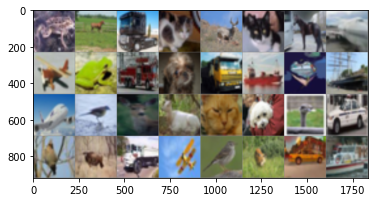

 forg horse truck   cat  deer   cat horse plane plane  forg truck   dog truck  ship  ship  ship plane  bird  deer  deer   cat   dog  bird   car  bird  deer truck plane  bird  deer   car  ship
cpu
[1,   50] loss: 0.576
[1,  100] loss: 0.576
[1,  150] loss: 0.576
[1,  200] loss: 0.576
[1,  250] loss: 0.576
[1,  300] loss: 0.576
[1,  350] loss: 0.576
[1,  400] loss: 0.576
[1,  450] loss: 0.576
[1,  500] loss: 0.576
[1,  550] loss: 0.576
[1,  600] loss: 0.576
[1,  650] loss: 0.576
[1,  700] loss: 0.576
[1,  750] loss: 0.576
[1,  800] loss: 0.575
[1,  850] loss: 0.576
[1,  900] loss: 0.575
[1,  950] loss: 0.575
[1, 1000] loss: 0.576
[1, 1050] loss: 0.575
[1, 1100] loss: 0.575
[1, 1150] loss: 0.575
[1, 1200] loss: 0.575
[1, 1250] loss: 0.575
[1, 1300] loss: 0.575
[1, 1350] loss: 0.575
[1, 1400] loss: 0.575
[1, 1450] loss: 0.575
[1, 1500] loss: 0.575
[1, 1550] loss: 0.575
[2,   50] loss: 0.575
[2,  100] loss: 0.575
[2,  150] loss: 0.574
[2,  200] loss: 0.574
[2,  250] loss: 0.574
[2,  300] lo

[12, 1000] loss: 0.171
[12, 1050] loss: 0.171
[12, 1100] loss: 0.170
[12, 1150] loss: 0.173
[12, 1200] loss: 0.165
[12, 1250] loss: 0.171
[12, 1300] loss: 0.167
[12, 1350] loss: 0.162
[12, 1400] loss: 0.177
[12, 1450] loss: 0.163
[12, 1500] loss: 0.167
[12, 1550] loss: 0.167
[13,   50] loss: 0.151
[13,  100] loss: 0.156
[13,  150] loss: 0.151
[13,  200] loss: 0.152
[13,  250] loss: 0.156
[13,  300] loss: 0.150
[13,  350] loss: 0.153
[13,  400] loss: 0.147
[13,  450] loss: 0.145
[13,  500] loss: 0.162
[13,  550] loss: 0.159
[13,  600] loss: 0.144
[13,  650] loss: 0.158
[13,  700] loss: 0.148
[13,  750] loss: 0.154
[13,  800] loss: 0.149
[13,  850] loss: 0.147
[13,  900] loss: 0.152
[13,  950] loss: 0.151
[13, 1000] loss: 0.151
[13, 1050] loss: 0.150
[13, 1100] loss: 0.162
[13, 1150] loss: 0.147
[13, 1200] loss: 0.159
[13, 1250] loss: 0.155
[13, 1300] loss: 0.149
[13, 1350] loss: 0.157
[13, 1400] loss: 0.146
[13, 1450] loss: 0.148
[13, 1500] loss: 0.157
[13, 1550] loss: 0.150
[14,   50] 

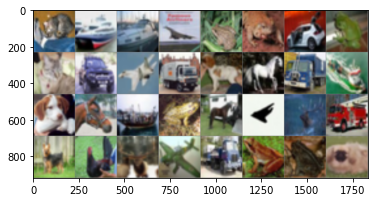

GroundTruth:    cat  ship  ship plane  forg  forg   car  forg   cat   car plane truck   dog horse truck  ship   dog horse  ship  forg horse plane  deer truck   dog  bird  deer plane truck  forg  forg   dog
Predicted:    cat  ship  ship plane  forg  forg   car  forg   cat   car plane truck   dog horse truck  ship   dog horse  ship  forg horse  bird plane truck  deer  bird  deer plane truck  forg   cat   dog
Accuracy of the network on the 50000 train images: 93 %
Accuracy of the network on the 10000 test images: 76 %
Accuracy of plane : 82 %
Accuracy of   car : 88 %
Accuracy of  bird : 58 %
Accuracy of   cat : 54 %
Accuracy of  deer : 72 %
Accuracy of   dog : 76 %
Accuracy of  forg : 82 %
Accuracy of horse : 86 %
Accuracy of  ship : 82 %
Accuracy of truck : 81 %


In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import torchvision
from torch.utils.data import DataLoader
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize(227),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=32, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data',train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=32, shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'forg', 'horse', 'ship', 'truck')

def imshow(img):
    img = img/2 + 0.5
    nping = img.numpy()
    plt.imshow(np.transpose(nping, (1, 2, 0)))
    plt.show()

images, labels = iter(trainloader).next()
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(32)))

class AlexNet(nn.Module):
    def __init__(self, num_classes=10):
        super(AlexNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 96, 11, 4)
        self.conv2 = nn.Conv2d(96, 256, 5, padding=2, groups=2)
        self.conv3 = nn.Conv2d(256, 384, 3, padding=1)
        self.conv4 = nn.Conv2d(384, 384, 3, padding=1, groups=2)
        self.conv5 = nn.Conv2d(384, 256, 3, padding=1, groups=2)
        self.fc1 = nn.Linear(256*6*6, 4096)
        self.fc2 = nn.Linear(4096, 4096)
        self.fc3 = nn.Linear(4096, num_classes)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2,2))
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = F.max_pool2d(F.relu(self.conv5(x)), (2,2))
        x = x.view(x.size(0), 256*6*6)
        x = F.dropout(F.relu(self.fc1(x)), p=0.5)
        x = F.dropout(F.relu(self.fc2(x)), p=0.5)
        x = self.fc3(x)
        return x

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

net = AlexNet()
net.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(20):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, lables = data
        inputs = inputs.to(device)
        lables = lables.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, lables)
        loss.backward()
        optimizer.step()
 
        running_loss += loss.item()
        if i % 50 == 49:
            print('[%d,%5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 200))
            running_loss = 0.0

print('Finished Training')
#torch.save(net, './model')
#net = torch.load('./model')
print(net)

images, labels = iter(testloader).next()
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(32)))

images, labels = images.to(device), labels.to(device)
outputs = net(images)
predicted = torch.argmax(outputs,1)
print('Predicted: ',' '.join('%5s' % classes[predicted[j]] for j in range(32)))

correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images)
        predicted = torch.argmax(outputs.data,1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images)
        predicted = torch.argmax(outputs.data, 1)
        c = (predicted== labels)
        if len(c) == 16:
            for i in range(16):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += c[i].item()
        else:
            for i in range(32):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1
 
 
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))